In [5]:
#SUPG implementation was done using linear basis functions for convection domainted problems


In [6]:
import sympy as sp

In [7]:
N=int(input("enter the number of elements"))
domain=[]    
for i in range(N+1):
    domain.append(i/N)


In [8]:
k=float(input("enter the constant"))
delta=k/N
delta

0.01

In [9]:
x=sp.Symbol("x")
function=[]
for i in range(N-1):
    expr=[]
    for j in range(N):
        if(i==j):
            f1=(x-domain[i])/(domain[i+1]-domain[i])
            expr.append(f1)
        elif(j==(i+1)):
            f2=(domain[i+2]-x)/(domain[i+2]-domain[i+1])
            expr.append(f2)
        else:
            expr.append(0)
    function.append(expr)

In [10]:
a_x=input("enter a(x): ")
a_x=sp.sympify(a_x)
b_x=input("enter b(x): ")
b_x=sp.sympify(b_x)
c_x=input("enter c(x): ")
c_x=sp.sympify(c_x)
f_x=input("enter f(x): ")
f_x=sp.sympify(f_x)
print(a_x,b_x,c_x,f_x)

1/10000 1 1 1


In [11]:
def simpson13(f,a,b,n):
    h=(b-a)/n
    result=f(a)+f(b)
    for i in range(1,n):
        x=a+i*h
        if(i%2==0):
            result=result+2*f(x)
        else:
            result=result+4*f(x)
    result=result*(h/3)
    return result

In [12]:
b=[]
for i in range(N-1):
    p1=sp.diff(function[i][i],x)
    y_1=f_x*function[i][i]+f_x*p1*delta
    f_1 = sp.lambdify(x, y_1, modules=['math'])
    r_1=simpson13(f_1,i/N,(i+1)/N,2)
    p2=sp.diff(function[i][i+1],x)
    y_2=f_x*function[i][i+1]+f_x*p2*delta
    f_2 = sp.lambdify(x, y_2, modules=['math'])
    r_2=simpson13(f_2,(i+1)/N,(i+2)/N,2)
    r=r_1+r_2
    b.append(r)

In [13]:
A=[]
for i in range(N-1):
    expr=[]
    for j in range(N-1):
        if(i==0):
            if(j==0):
                p1=sp.diff(function[0][0],x)
                ad=sp.diff(a_x,x)
                f_1=a_x*p1*p1+(b_x)*p1*(function[0][0]+sp.diff(function[0][0],x)*delta)+c_x*function[0][0]*(function[0][0]+sp.diff(function[0][0],x)*delta)
                y1 = sp.lambdify(x, f_1, modules=['math'])
                r1=simpson13(y1,0,1/N,4)
                p2=sp.diff(function[0][1],x)
                f_2=a_x*p2*p2+(b_x)*p2*(function[0][1]+sp.diff(function[0][1],x)*delta)+c_x*function[0][1]*(function[0][1]+sp.diff(function[0][1],x)*delta)
                y2 = sp.lambdify(x, f_2, modules=['math'])
                r2=simpson13(y2,1/N,2/N,4)
                r=r1+r2
                expr.append(r)
            elif(j==1):
                p1=sp.diff(function[0][1],x)
                p2=sp.diff(function[1][1],x)
                ad=sp.diff(a_x,x)
                f_1=a_x*p1*p2+(b_x)*p2*(function[0][1]+sp.diff(function[0][1],x)*delta)+c_x*function[1][1]*(function[0][1]+sp.diff(function[0][1],x)*delta)
                y1 = sp.lambdify(x, f_1, modules=['math'])
                r1=simpson13(y1,1/N,2/N,4)
                expr.append(r1)
            else:
                expr.append(0)
        elif(i==(N-2)):
            if(j==(N-2)):
                p1=sp.diff(function[N-2][N-2],x)
                ad=sp.diff(a_x,x)
                f_1=a_x*p1*p1+(b_x)*p1*(function[N-2][N-2]+sp.diff(function[N-2][N-2],x)*delta)+c_x*function[N-2][N-2]*(function[N-2][N-2]+sp.diff(function[N-2][N-2],x)*delta)
                y1 = sp.lambdify(x, f_1, modules=['math'])
                r1=simpson13(y1,(N-2)/N,(N-1)/N,4)
                p2=sp.diff(function[N-2][N-1],x)
                f_2=a_x*p2*p2+(b_x)*p2*(function[N-2][N-1]+sp.diff(function[N-2][N-1],x)*delta)+c_x*function[N-2][N-1]*(function[N-2][N-1]+sp.diff(function[N-2][N-1],x)*delta)
                y2 = sp.lambdify(x, f_2, modules=['math'])
                r2=simpson13(y2,(N-1)/N,1,4)
                r=r1+r2
                expr.append(r)
            elif(j==(N-3)):
                p1=sp.diff(function[N-3][N-2],x)
                p2=sp.diff(function[N-2][N-2],x)
                ad=sp.diff(a_x,x)
                f_1=a_x*p1*p2+(b_x)*p1*(function[N-2][N-2]+sp.diff(function[N-2][N-2],x)*delta)+c_x*function[N-3][N-2]*(function[N-2][N-2]+sp.diff(function[N-2][N-2],x)*delta)
                y1 = sp.lambdify(x, f_1, modules=['math'])
                r1=simpson13(y1,(N-2)/N,(N-1)/N,4)
                expr.append(r1)
            else:
                expr.append(0)
        else:
            if(i==j):
                p1=sp.diff(function[i][i],x)
                ad=sp.diff(a_x,x)
                f_1=a_x*p1*p1+(b_x)*p1*(function[i][i]+sp.diff(function[i][i],x)*delta)+c_x*function[i][i]*(function[i][i]+sp.diff(function[i][i],x)*delta)
                y1 = sp.lambdify(x, f_1, modules=['math'])
                r1=simpson13(y1,(i)/N,(i+1)/N,4)
                p2=sp.diff(function[i][i+1],x)
                f_2=a_x*p2*p2+(b_x)*p2*(function[i][i+1]+sp.diff(function[i][i+1],x)*delta)+c_x*function[i][i+1]*(function[i][i+1]+sp.diff(function[i][i+1],x)*delta)
                y2 = sp.lambdify(x, f_2, modules=['math'])
                r2=simpson13(y2,(i+1)/N,(i+2)/N,4)
                r=r1+r2
                expr.append(r)
            elif(j==(i-1)):
                p1=sp.diff(function[j][i],x)
                p2=sp.diff(function[i][i],x)
                ad=sp.diff(a_x,x)
                f_1=a_x*p1*p2+(b_x)*p1*(function[i][i]+sp.diff(function[i][i],x)*delta)+c_x*function[j][i]*(function[i][i]+sp.diff(function[i][i],x)*delta)
                y1 = sp.lambdify(x, f_1, modules=['math'])
                r1=simpson13(y1,(i)/N,(i+1)/N,4)
                expr.append(r1)
            elif(j==(i+1)):
                p1=sp.diff(function[i][j],x)
                p2=sp.diff(function[j][j],x)
                ad=sp.diff(a_x,x)
                f_1=a_x*p1*p2+(b_x)*p2*(function[i][j]+sp.diff(function[i][j],x)*delta)+c_x*(function[i][j]+sp.diff(function[i][j],x)*delta)*function[j][j]
                y1 = sp.lambdify(x, f_1, modules=['math'])
                r1=simpson13(y1,(i+1)/N,(i+2)/N,4)
                expr.append(r1)
            else:
                expr.append(0)
    A.append(expr)
        
        


In [14]:
import numpy as np
A=np.array(A)
b=np.array(b)
x=np.linalg.solve(A,b)


In [15]:
for i in range(N-1):
    for j in range(N):
        function[i][j]=function[i][j]*x[i]

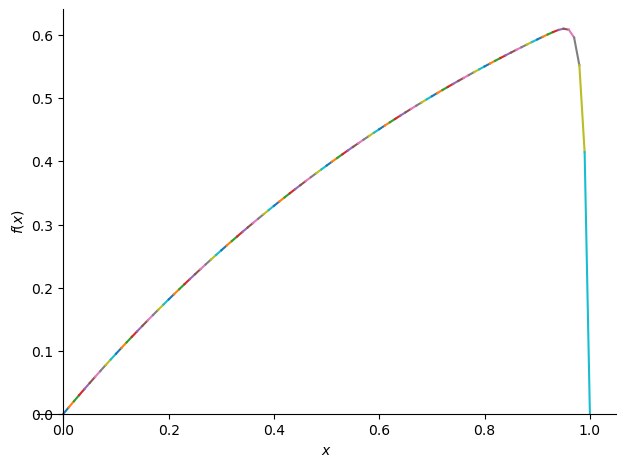

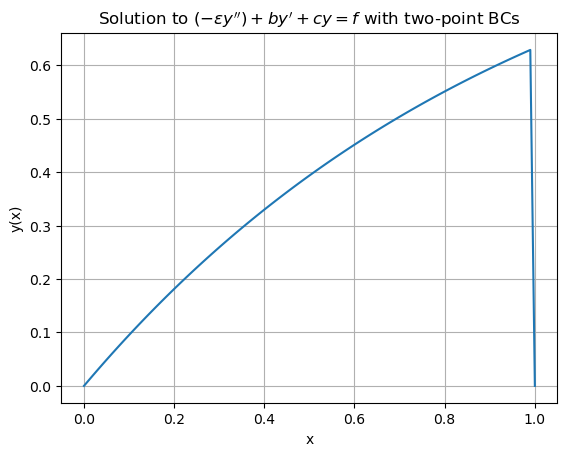

In [16]:
x=sp.Symbol("x")
plotarg=[]
for i in range(N-1):
    for j in range(N):
        if(i==j==0):
            plotarg.append((function[0][0],(x,0,1/N)))
        elif(i==N-2 and j==N-1):
            plotarg.append((function[i][j],(x,(N-1)/N,1)))
        elif(i==j!=0):
            plotarg.append((function[i-1][j]+function[i][j],(x,(j)/N,(j+1)/N)))


p = sp.plot(*plotarg, show=False)
p.show() 
import numpy as np
import matplotlib.pyplot as plt
epsilon = float(a_x)
e_inv = np.exp(-1)
e_neg10001 = np.exp(-(1/epsilon+1))
e_neg10002 = np.exp(-(1/epsilon+2))
A = (e_inv - 1) * e_neg10001 / (1 - e_neg10002)
B = -1 - A

def y_stable(x):
    return ((e_inv - 1) * np.exp(-(1/epsilon+1) * (1 - x)) / (1 - e_neg10002)
            + (-1 - (e_inv - 1) * e_neg10001 / (1 - e_neg10002)) * np.exp(-x) + 1)

# Plot
x = np.linspace(0, 1, 100)
plt.plot(x, y_stable(x))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solution to $(-\\epsilon y\'\') + by\' + cy = f$ with two-point BCs')
plt.grid(True)
plt.show()